In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
import lhsmdu
import time

from PIL import Image, ImageDraw

In [30]:
def xy_rand():
    x = 3*np.random.random_sample()-2       # X domain is [-2,1]
    y = 2*np.random.random_sample()-1       # Y domain is [-1,1]
    return x,y 

4
0
1
2
3
[[-1.625  0.     0.     0.   ]
 [ 0.    -0.125  0.     0.   ]
 [ 0.     0.    -1.625  0.   ]
 [ 0.     0.    -0.125  0.   ]]


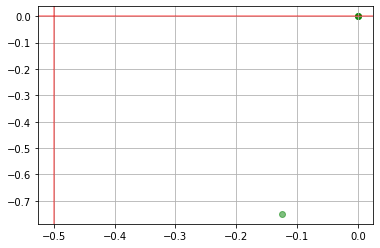

In [195]:
xrange = [-2,1]
yrange = [-1,1]

def xy_orth(samples, dimensions = 2, strength = 1):
    samples = samples
    dimensions = dimensions
    strength = strength
    MAJOR = int(samples**(1/strength))
    print(MAJOR)
    xlist = np.zeros([int(MAJOR), int(MAJOR)])
    ylist = np.zeros([int(MAJOR), int(MAJOR)])
    xdif = xrange[1] - xrange[0]
    ydif = yrange[1] - yrange[0]
    MAJOR = int(MAJOR/4)
    for subsquare in range(4):
        if subsquare%2 == 0:
            xrangenow = [xrange[0], xrange[0]+0.5*xdif]
        else:
            xrangenow = [xrange[0]+0.5*xdif, xrange[1]]
        if subsquare < 2:
            yrangenow = [yrange[0], yrange[0]+0.5*ydif]
        else:
            yrangenow = [yrange[0]+0.5*ydif, yrange[1]]
        xdifnow = xdif/2
        ydifnow = ydif/2
            

    #     init_genrand(3737);
        m = 0
        n = 0
            ## Divide the entire area into MAJOR * MAJOR sub-squares */
            ## Divide each subsquare into MAJOR * MAJOR cells */
            ## The first index determines the row/column number of the subsquare */
            ### So xlist[2][5] would indicate what minor column contains the sample
            ###   in the major cell with major column number 2 and major row number 5
            ###  ylist[2][5] will provide its minor row number */
       
        for i in range(MAJOR):
            i = i + subsquare*MAJOR
            print(i)
            m = xrangenow[0] + (0.5/samples)*xdif
            n = yrangenow[0] + (0.5/samples)*ydif
            for j in range(MAJOR):
                j = j + subsquare*MAJOR
                xlist[i][j] = m #+ np.random.random_sample()*xdif*(1/(2*MAJOR))
                ylist[i][j] = n #+ np.random.random_sample()*ydif*(1/(2*MAJOR))
                n += (1/samples)*ydif
                m += (1/samples)*xdif
    
    #     print(xlist)
    for k in range(samples):
        for i in range(MAJOR):
            i = i + subsquare*MAJOR
            ##              /* Due to the way the lists have been created subranges with similar
            ##              x or y values will stay together
            ##              xlist[i] is a pointer to the start of the 1D array xlist[i][0] ... xlist[i][MAJOR - 1]
            xlist[i] = np.random.permutation(xlist[i])
            ylist[i] = np.random.permutation(ylist[i])
    #         for i in range (MAJOR):          ##     /* Subsquare column */

    #             for j in range(MAJOR):       ##  /* Subsquare row */

    #                     ##    /* For a given subsquare column (i) every subsquare has its sample in
    #                     ##     a different column of cells (as determined by xlist[i][j]
    #                     ##    The random long double value selects a random point in the minor subsquare
    #                 x = -2.0 + scale * (xlist[i][j] + np.random.random_sample())

    #                     ##    /* For a given subsquare row, every subsquare has its sample in a different 
    #                     ##   row of cells */
    #                 y = -2.0 + scale * (ylist[j][i] + np.random.random_sample());

    #                     ##    /* Do the desired computation with with x and y at this point in the code */
    print(xlist)
#     print(ylist)
    return xlist,ylist

x_orth, y_orth = xy_orth(4)
# plt.scatter(x_LHS, y_LHS, color="b", label="LHS-MDU", alpha = 0.5)
plt.scatter(x_orth[1], y_orth[1], color="g", label="Orthogonal", alpha = 0.5)
# plt.scatter(xlist, ylist, color="r", label="MC", alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='-', alpha = 0.5)
plt.axvline(x=-0.5, color='r', linestyle='-', alpha = 0.5)

# plt.legend()
plt.grid()
plt.show()

20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


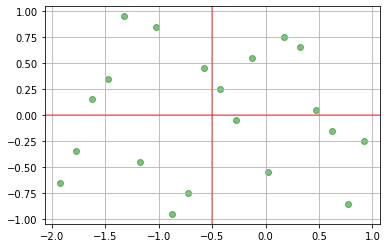

In [208]:
xrange = [-2,1]
yrange = [-1,1]

def xy_orth(samples, dimensions = 2, strength = 1):
    samples = samples
    dimensions = dimensions
    strength = strength
    MAJOR = int(samples**(1/strength))
    print(MAJOR)
    xlist = np.zeros([int(MAJOR), int(MAJOR)])
    ylist = np.zeros([int(MAJOR), int(MAJOR)])
    xdif = xrange[1] - xrange[0]
    ydif = yrange[1] - yrange[0]
            

    #     init_genrand(3737);
    m = 0
    n = 0
        ## Divide the entire area into MAJOR * MAJOR sub-squares */
        ## Divide each subsquare into MAJOR * MAJOR cells */
        ## The first index determines the row/column number of the subsquare */
        ### So xlist[2][5] would indicate what minor column contains the sample
        ###   in the major cell with major column number 2 and major row number 5
        ###  ylist[2][5] will provide its minor row number */

    for i in range(MAJOR):
        print(i)
        m = xrange[0] + (0.5/samples)*xdif
        n = yrange[0] + (0.5/samples)*ydif
        for j in range(MAJOR):
            xlist[i][j] = m #+ np.random.random_sample()*xdif*(1/(2*MAJOR))
            ylist[i][j] = n #+ np.random.random_sample()*ydif*(1/(2*MAJOR))
            n += (1/samples)*ydif
            m += (1/samples)*xdif

#     print(xlist)
    for k in range(samples):
        for i in range(MAJOR):
            ##              /* Due to the way the lists have been created subranges with similar
            ##              x or y values will stay together
            ##              xlist[i] is a pointer to the start of the 1D array xlist[i][0] ... xlist[i][MAJOR - 1]
            xlist[i] = np.random.permutation(xlist[i])
            ylist[i] = np.random.permutation(ylist[i])
    #         for i in range (MAJOR):          ##     /* Subsquare column */

    #             for j in range(MAJOR):       ##  /* Subsquare row */

    #                     ##    /* For a given subsquare column (i) every subsquare has its sample in
    #                     ##     a different column of cells (as determined by xlist[i][j]
    #                     ##    The random long double value selects a random point in the minor subsquare
    #                 x = -2.0 + scale * (xlist[i][j] + np.random.random_sample())

    #                     ##    /* For a given subsquare row, every subsquare has its sample in a different 
    #                     ##   row of cells */
    #                 y = -2.0 + scale * (ylist[j][i] + np.random.random_sample());

    #                     ##    /* Do the desired computation with with x and y at this point in the code */
#     print(xlist)
#     print(ylist)
    return xlist,ylist

x_orth, y_orth = xy_orth(20)
# plt.scatter(x_LHS, y_LHS, color="b", label="LHS-MDU", alpha = 0.5)
plt.scatter(x_orth[1], y_orth[1], color="g", label="Orthogonal", alpha = 0.5)
# plt.scatter(xlist, ylist, color="r", label="MC", alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='-', alpha = 0.5)
plt.axvline(x=-0.5, color='r', linestyle='-', alpha = 0.5)

# plt.legend()
plt.grid()
plt.show()

In [64]:
def xy_LHS(x):
    l = lhsmdu.sample(2,x)
    x,y = (l[0][0]), (l[1][0])
    x = x.tolist()
    x = x[0]
    for xind in range(len(x)):
        x[xind] = 3*x[xind]-2
    y = y.tolist()
    y = y[0]
    for yind in range(len(y)):
        y[yind] = 2*y[yind]-1
    return x,y



[[0. 1.]
 [2. 3.]]
[[0. 1.]
 [3. 2.]]
[[1. 0.]
 [3. 2.]]


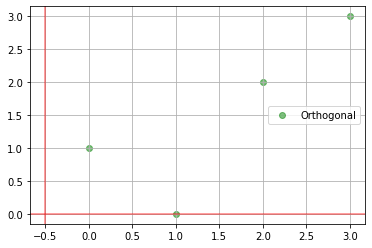

In [75]:
x_orth, y_orth = xy_orth(5)

x_LHS,y_LHS = xy_LHS(10)

xlist = []
ylist = []
for i in range(10):
    x, y = xy_rand()
#     x = (x+ 2)/3
#     y = (y + 1)/2
    xlist.append(x)
    ylist.append(y)
    
# plt.scatter(x_LHS, y_LHS, color="b", label="LHS-MDU", alpha = 0.5)
plt.scatter(x_orth, y_orth, color="g", label="Orthogonal", alpha = 0.5)
# plt.scatter(xlist, ylist, color="r", label="MC", alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='-', alpha = 0.5)
plt.axvline(x=-0.5, color='r', linestyle='-', alpha = 0.5)

plt.legend()
plt.grid()
plt.show()

In [83]:
import oapackage

# array=oapackage.exampleArray(2)
# array.showarray()

X=(4*np.random.rand( 20, 2)).astype(int)
print(X)
array=oapackage.array_link(X)
array.showarraycompact()

[[1 2]
 [2 3]
 [1 2]
 [1 0]
 [2 3]
 [0 0]
 [2 2]
 [1 2]
 [3 0]
 [0 0]
 [2 1]
 [3 2]
 [1 0]
 [2 1]
 [3 1]
 [1 2]
 [0 2]
 [0 2]
 [2 2]
 [2 0]]
12
23
12
10
23
00
22
12
30
00
21
32
10
21
31
12
02
02
22
20
